In [1]:
from NetClasses import *
from SobolevClasses import *
import pandas as pd

2024-06-16 22:07:32.163332: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
# import tensorflow as tf
# device_name = tf.test.gpu_device_name()
# if device_name != '/device:GPU:0':
#   raise SystemError('GPU device not found')
# print('Found GPU at: {}'.format(device_name))

Attempt to use neural networks to approximate functions in the Discrete Sobolev Space

## What we want to show

$$
\left\| f - \sum_{j=1}^{n} a_j(f) \varphi(A_j(\cdot) + b)  \right\|_p \leq c n^{-r/s} \left\| f \right\|_{W_{r,s}^{p}}
$$

i.e. the neural network can approximate the function in the Sobolev space with a rate of $n^{-r/s}$ w.r.t the Lp norm.

### Notation
- $r$ : smoothness of the function in the Sobolev space
- $p$ : $L^p$ norm to be used
- $s$ : dimension of the input space

In [3]:
def RunShallowTest(f,n_inputs=1,n_outputs=1,n_samples=200):
    """
    Input: f a function
    Output: Graph of final loss of varying width shallow networks
    """

    # Create Dataset Generator
    gen_func = FunctionSamples(f, n_samples=n_samples, n_inputs=n_inputs, n_outputs=n_outputs)
    ds = gen_func.get_dataset()

    def Lp_loss(y_true, y_pred, p=2):
        if p < 1:
            raise ValueError("p must be greater than or equal to 1")

        # Calculate the absolute difference raised to the power of p
        difference_power_p = abs(y_true - y_pred) ** p

        # Take the p-th root of the result
        return difference_power_p ** (1/p)

    # Take 20 Widths from 1->2500
    N = np.arange(1, 2500, 125)
    # Create empty dataframe to store results
    results = pd.DataFrame(columns=['N', 'Loss'])
    # Number of trials ran
    for i in range(20):
        # Create the network
        # Structure: number of neurons
        # Input Layer: n_inputs
        # Hidden layer: n
        # Output layer: n_outputs

        for n in tqdm(N, desc=f"Trial {i}"):
          with tf.device('/device:GPU:0'):
            net = ShallowNetwork(n_inputs,n,n_outputs).build_model()
            ds = gen_func.get_dataset()

            net.compile(optimizer='adam', loss=Lp_loss)
            net.fit(ds, epochs=50, verbose=0)
            loss = net.evaluate(ds, verbose=0)
            results = pd.concat([results, pd.DataFrame({'N': [n], 'Loss': [loss]})])
            # print(f"n: {n}, loss: {loss}")

    results.to_csv(f"data/Shallow{f.__name__}.csv")
    # Average the results
    results = results.groupby('N').mean()
    results.plot()
    plt.title(f"Sobolev Test for {f.__name__}")
    plt.xlabel("Width of Network")
    plt.ylabel("Loss")
    plt.yscale('log')
    plt.show()
    return results

Trial 0:   0%|          | 0/20 [00:00<?, ?it/s]/Users/arnav/opt/anaconda3/envs/tf/lib/python3.9/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2024-06-16 22:07:42.644686: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
/Users/arnav/opt/anaconda3/envs/tf/lib/python3.9/contextlib.py:137: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)
2024-06-16 22:07:42.808950: W tensorflow/core/framework/local_rendezvou

2024-06-16 22:08:27.603149: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
Trial 0:  25%|██▌       | 5/20 [00:46<02:16,  9.10s/it]/Users/arnav/opt/anaconda3/envs/tf/lib/python3.9/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2024-06-16 22:08:28.454769: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
/Users/arnav/opt/anaconda3/envs/tf/lib/python3.9/contextlib.py:137: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` b

2024-06-16 22:08:35.356648: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
Trial 0:  30%|███       | 6/20 [00:53<02:00,  8.64s/it]/Users/arnav/opt/anaconda3/envs/tf/lib/python3.9/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2024-06-16 22:08:36.160472: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
/Users/arnav/opt/anaconda3/envs/tf/lib/python3.9/contextlib.py:137: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` b

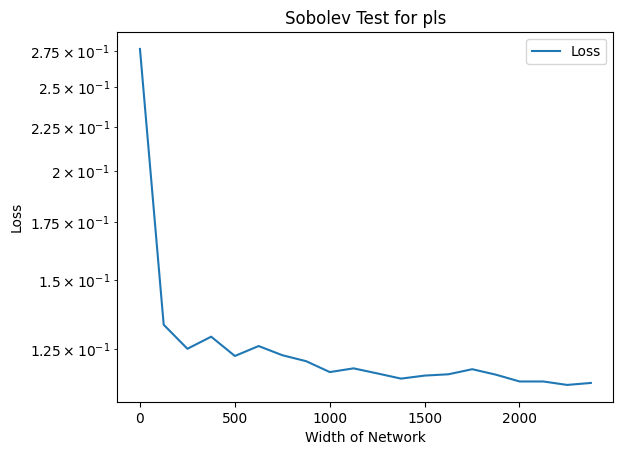

Loss
N             
1     0.276651
126   0.133165
251   0.124941
376   0.129012
501   0.122576
626   0.125849
751   0.122820
876   0.120901
1001  0.117456
1126  0.118624
1251  0.117043
1376  0.115438
1501  0.116370
1626  0.116773
1751  0.118354
1876  0.116645
2001  0.114564
2126  0.114563
2251  0.113524
2376  0.114120

In [4]:
def pls(x):
    if -1 <= x < -0.5:
        return 2 * x + 2
    elif -0.5 <= x < 0:
        return -2 * x
    elif 0 <= x < 0.5:
        return 2 * x
    elif 0.5 <= x <= 1:
        return -2 * x + 2
    else:
        return None  # x is out of the defined domain

RunShallowTest(pls, n_inputs=1,n_outputs=1,n_samples=100)